In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

We have a shear type frame, with constant floor masses and constant storey stiffnesses. We have to specify just the number of stories

In [2]:
ns = 10

We form the structural matrices

In [3]:
ones = np.ones(ns)
M = np.diag(ones)
K = np.diag(ones*2)
K[-1,-1] = 1
K = K - np.diag(ones[1:], -1) - np.diag(ones[1:], +1)
evals, evecs = eigh(K, M)
evals[:3]

array([0.02233835, 0.19806226, 0.53389626])

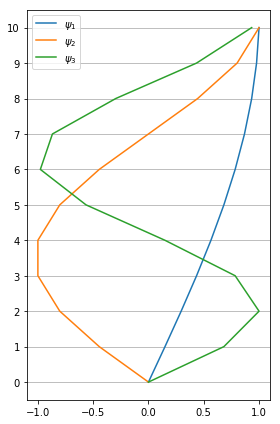

In [4]:
def eigenplot(ns, evecs, ne=None, norm=False, fig_ax=None, title=None):
    if fig_ax is None:
        fig, ax = plt.subplots(figsize=(4,6))
    else:
        fig, ax = fig_ax   
    if ne is None: ne=ns 
    x = np.arange(ns+1)
    y = evecs/(np.abs(evecs).max(axis=0) if norm else 1)/np.sign(evecs[-1]) 
    y = np.vstack((np.zeros(y.shape[1]), y))
    for i, evec in enumerate((y.T)[:ne], 1): 
        ax.plot(evec, x, label='$\\psi_{%d}$'%i)
    ax.legend() 
    ax.grid(b=1, axis='y') 
    ax.yaxis.set_major_locator(plt.MultipleLocator(1))
    if title : ax.set_title(title)
    if not fig_ax : fig.tight_layout() 
eigenplot(ns, evecs, ne=3, norm=1)

## Matrix Iteration

In [5]:
D0 = np.linalg.inv(K)@M
S = np.diag(ones)
sevals, sevecs = [], []
for i in range(3):
    D = D0@S
    x = ones
    w2old = 0
    while True:
        xh = D@x
        temp = xh@M
        w2 = (temp@x)/(temp@xh)
        x = xh*w2
        if abs(w2-w2old)/w2 < 1E-8 : break
        w2old = w2
    sevals.append(w2)
    sevecs.append(x)
    modal_m = x.T@M@x
    S = S - np.outer(x,x)@M/modal_m
print(evals[:3])
print(sevals)
sevecs = np.array(sevecs).T

[0.02233835 0.19806226 0.53389626]
[0.02233834754982318, 0.19806226447127626, 0.5338962570295263]


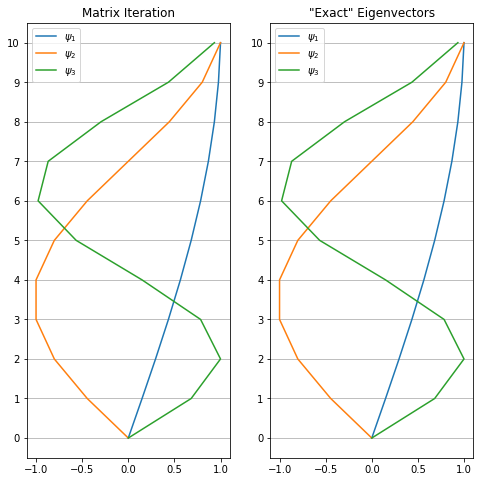

In [6]:
fig, axes = plt.subplots(1,2,figsize=(8,8))
eigenplot(ns, sevecs, norm=1, fig_ax=(fig, axes[0]), title='Matrix Iteration')
eigenplot(ns, evecs, ne=3, norm=1, fig_ax=(fig, axes[1]), title='"Exact" Eigenvectors')

## Ritz-Rayleigh

[0.02242333 0.20028235 0.54679272 1.05523061 1.5829291  2.42315735
 3.21514883 3.65172977]
[0.02233835 0.19806226 0.53389626 1.         1.55495813 2.14946019
 2.73068205 3.2469796 ]


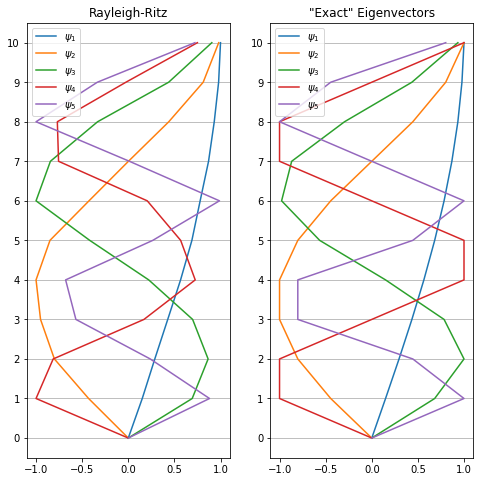

In [7]:
np.random.seed(20190402)
phi = D0@(np.random.random((ns,8))-0.5)
k, m = phi.T@K@phi, phi.T@M@phi
zevals, zevecs = eigh(k, m)
psi = phi@zevecs
print(zevals)
print(evals[:8])
fig, axes = plt.subplots(1,2,figsize=(8,8))
eigenplot(ns, psi, ne=5,norm=1, fig_ax=(fig, axes[0]), title='Rayleigh-Ritz')
eigenplot(ns, evecs, ne=5, norm=1, fig_ax=(fig, axes[1]), title='"Exact" Eigenvectors')

## Subspace Iteration no.1

4 Ritz vectors

Ex [0.02233835 0.19806226 0.53389626 1.        ]
SI [0.02233835 0.19839125 0.53833669 1.02589191]


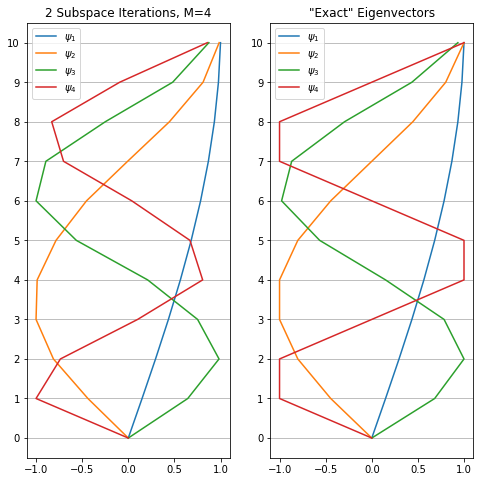

In [8]:
np.random.seed(20190402)
psi = np.random.random((ns, 4))
for i in range(2):
    phi = D0@psi
    k, m = phi.T@K@phi, phi.T@M@phi
    zevals, zevecs = eigh(k, m)
    psi = phi@zevecs
print('Ex', evals[:4])
print('SI', zevals[:4])
fig, axes = plt.subplots(1,2,figsize=(8,8))
eigenplot(ns, psi,   ne=4, norm=1, fig_ax=(fig, axes[0]), title='2 Subspace Iterations, M=4')
eigenplot(ns, evecs, ne=4, norm=1, fig_ax=(fig, axes[1]), title='"Exact" Eigenvectors')

## Subspace Iteration no. 2

8 Ritz vectors

Ex [0.02233835 0.19806226 0.53389626 1.        ]
SI [0.02233835 0.19806684 0.53437129 1.00128497]


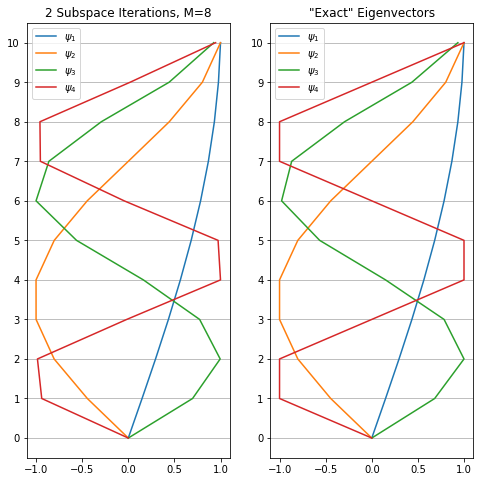

In [9]:
np.random.seed(20190402)
psi = np.random.random((ns, 8))
for i in range(2):
    phi = D0@psi
    k, m = phi.T@K@phi, phi.T@M@phi
    zevals, zevecs = eigh(k, m)
    psi = phi@zevecs
print('Ex', evals[:4])
print('SI', zevals[:4])
fig, axes = plt.subplots(1,2,figsize=(8,8))
eigenplot(ns, psi,   ne=4, norm=1, fig_ax=(fig, axes[0]), title='2 Subspace Iterations, M=8')
eigenplot(ns, evecs, ne=4, norm=1, fig_ax=(fig, axes[1]), title='"Exact" Eigenvectors')

In [10]:
ns = 1000
ones = np.ones(ns)
M = np.diag(ones)
K = np.diag(ones*2)
K[-1,-1] = 1
K = K - np.diag(ones[1:], -1) - np.diag(ones[1:], +1)
K = K*500
evals, evecs = eigh(K, M)
evals[:3]
D0 = np.linalg.inv(K)@M

In [11]:
np.random.seed(20190402)
psi = np.random.random((ns, 4))
for i in range(3):
    phi = D0@psi
    k, m = phi.T@K@phi, phi.T@M@phi
    zevals, zevecs = eigh(k, m)
    psi = phi@zevecs
print('Ex', evals[:4])
print('SI', zevals[:4])
#fig, axes = plt.subplots(1,2,figsize=(8,8))
#eigenplot(ns, psi,   ne=4, norm=1, fig_ax=(fig, axes[0]), title='2 Subspace Iterations, M=4')
#eigenplot(ns, evecs, ne=4, norm=1, fig_ax=(fig, axes[1]), title='"Exact" Eigenvectors')

Ex [0.00123247 0.01109219 0.03081154 0.06039031]
SI [0.00123247 0.01109221 0.03082139 0.06165218]


In [12]:
np.random.seed(20190402)
psi = np.random.random((ns, 6))
for i in range(3):
    phi = D0@psi
    k, m = phi.T@K@phi, phi.T@M@phi
    zevals, zevecs = eigh(k, m)
    psi = phi@zevecs
print('Ex', evals[:4])
print('SI', zevals[:4])


Ex [0.00123247 0.01109219 0.03081154 0.06039031]
SI [0.00123247 0.01109235 0.03087109 0.0606571 ]
